In [1]:
# How does budget correlate with IMDb rating? Does more budget mean a better rating?

# Import Libraries
import requests
import json
import matplotlib.pyplot as plt
import pandas as pd
import ast
import numpy as np
from pprint import pprint
# from config import omdb_api_key

# Import The Movie Dataset CSVs into Dataframes
credits_df = pd.read_csv("../Resources/credits.csv")
keywords_df = pd.read_csv("../Resources/keywords.csv")
links_small_df = pd.read_csv("../Resources/links_small.csv")
links_df = pd.read_csv("../Resources/links.csv")
movies_df = pd.read_csv("../Resources/movies_metadata.csv")
ratings_small_df = pd.read_csv("../Resources/ratings_small.csv")
ratings_df = pd.read_csv("../Resources/ratings.csv")

C:\Users\flash\AppData\Local\Temp\ipykernel_3992\3460832683.py:18: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_df = pd.read_csv("../Resources/movies_metadata.csv")


In [2]:
# Setting OMDB query param for looking up IMDb IDs
omdb_api_key = ""
url = "http://www.omdbapi.com/?i="
api_key = "&apikey=" + omdb_api_key

In [3]:
# Dropping unneeded columns for movie dataframe
q5_clean_movies_df = movies_df.drop(columns = ["adult", 
                                          "belongs_to_collection", 
                                          "genres", 
                                          "homepage", 
                                          "original_language",
                                          "original_title", 
                                          "overview",
                                          "popularity",
                                          "poster_path",
                                          "production_companies",
                                          "production_countries",
                                          "release_date",
                                          "revenue", 
                                          "runtime", 
                                          "spoken_languages", 
                                          "status", 
                                          "tagline", 
                                          "video"])



In [4]:
# Filtering with movies with 1000+ votes
q5_filtered_movies_df = q5_clean_movies_df.loc[q5_clean_movies_df['vote_count'] > 1000]

# Changing Data type and formatting for budget
change_types = {'budget': int}
q5_filtered_movies_df = q5_filtered_movies_df.astype(change_types)
q5_filtered_movies_df['budget'] = pd.to_numeric(q5_filtered_movies_df['budget'], errors='coerce')
q5_filtered_movies_df

,budget,id,imdb_id,title,vote_average,vote_count
0,30000000,862,tt0114709,Toy Story,7.7,5415.0
1,65000000,8844,tt0113497,Jumanji,6.9,2413.0
5,60000000,949,tt0113277,Heat,7.7,1886.0
9,58000000,710,tt0113189,GoldenEye,6.6,1194.0
15,52000000,524,tt0112641,Casino,7.8,1343.0
...,...,...,...,...,...,...
43644,34000000,339403,tt3890160,Baby Driver,7.2,2083.0
44009,80000000,324852,tt3469046,Despicable Me 3,6.2,2002.0
44274,152000000,281338,tt3450958,War for the Planet of the Apes,6.7,1675.0
44678,100000000,374720,tt5013056,Dunkirk,7.5,2712.0


In [5]:
# Sorting budget column
q5_filtered_movies_df = q5_filtered_movies_df.sort_values(by='budget', ascending=False)

# Taking the top 100 movies with the most budget
q5_movies_top100_df = q5_filtered_movies_df.head(100)
pd.set_option('display.max_rows', 100)

In [6]:
# Sorting budget column
q5_filtered_movies_df = q5_filtered_movies_df.sort_values(by='budget', ascending=True)

# Filtering with movies with 0 budget
q5_filtered_movies_df = q5_filtered_movies_df.loc[q5_filtered_movies_df['budget'] > 0]

# Taking the top 100 movies with the most budget
q5_movies_bottom100_df = q5_filtered_movies_df.head(100)
pd.set_option('display.max_rows', 100)


In [7]:
# Counting number of 7+, 6.99 - 5, and 4.99 - 0 for Top 100 movies with most budget

# 7+
topscores_7plus_df = q5_movies_top100_df[(q5_movies_top100_df['vote_average'] >= 7)]
topscores_7plus_count = len(topscores_7plus_df)
print(topscores_7plus_count)



34


In [8]:
# 6.99 - 5
topscores_6thru5_df = q5_movies_top100_df[(q5_movies_top100_df['vote_average'] >= 5) & (q5_movies_top100_df['vote_average'] <= 6.99)]
topscores_6thru5_count = len(topscores_6thru5_df)
print(topscores_6thru5_count)


65


In [9]:
# 4.99 - 0
topscores_4andless_df = q5_movies_top100_df[(q5_movies_top100_df['vote_average'] <= 4.99)]
topscores_4andless_count = len(topscores_4andless_df)
print(topscores_4andless_count)

1


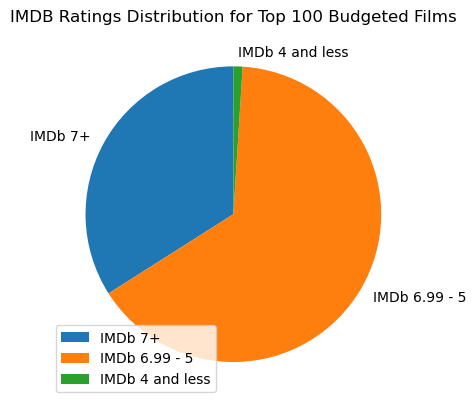

In [10]:
# Pie Chart to showcase how movies appear based on rating

y = np.array([topscores_7plus_count, topscores_6thru5_count, topscores_4andless_count])
labels = ['IMDb 7+', 'IMDb 6.99 - 5', 'IMDb 4 and less']

plt.pie(y, labels=labels, startangle=90)
plt.title('IMDB Ratings Distribution for Top 100 Budgeted Films')
plt.legend(loc='lower left')
plt.show()

In [11]:
# Implementing IMDb ID from Dataframe into OMDb API call
imdb_id = topscores_4andless_df.loc[topscores_4andless_df['title'] == 'Independence Day: Resurgence', 'imdb_id'].values[0]
response = requests.get(url + imdb_id + api_key)

# Converting the response to JSON, and printing the result.
data = response.json()

In [12]:
# Print information about worst rated movie with the most budget

movie_title = data['Title']
movie_budget = topscores_4andless_df['budget'].iloc[0]
movie_boxoffice = data['BoxOffice']
imdb_rating = topscores_4andless_df['vote_average'].iloc[0]

print(f'The movie {movie_title} had a budget of ${movie_budget:,}. Their Box Office was {movie_boxoffice} with an IMDb rating of {imdb_rating}.')
print()

The movie Independence Day: Resurgence had a budget of $165,000,000. Their Box Office was $103,144,286 with an IMDb rating of 4.9.



In [13]:
# Counting number of 7+, 6.99 - 5, and 4.99 - 0 for Top 100 movies with the least budget

# 7+
bottomscores_7plus_df = q5_movies_bottom100_df[(q5_movies_bottom100_df['vote_average'] >= 7)]
bottomscores_7plus_count = len(bottomscores_7plus_df)
print(bottomscores_7plus_count )

67


In [14]:
# 6.99 - 5
bottomscores_6thru5_df = q5_movies_bottom100_df[(q5_movies_bottom100_df['vote_average'] >= 5) & (q5_movies_bottom100_df['vote_average'] <= 6.99)]
bottomscores_6thru5_count = len(bottomscores_6thru5_df)
print(bottomscores_6thru5_count)

31


In [15]:
# 4.99 - 0
bottomscores_4andless_df = q5_movies_bottom100_df[(q5_movies_bottom100_df['vote_average'] <= 4.99)]
bottomscores_4andless_count = len(bottomscores_4andless_df)
print(bottomscores_4andless_count)

2


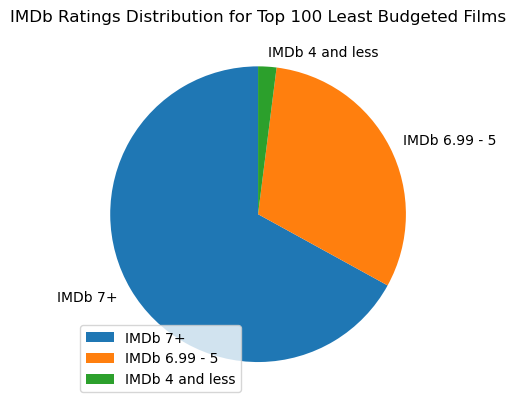

In [16]:
# Pie Chart to showcase how movies appear based on rating (Least Budget)

y = np.array([bottomscores_7plus_count, bottomscores_6thru5_count, bottomscores_4andless_count])
labels = ['IMDb 7+', 'IMDb 6.99 - 5', 'IMDb 4 and less']

plt.pie(y, labels=labels, startangle=90)
plt.title('IMDb Ratings Distribution for Top 100 Least Budgeted Films')
plt.legend(loc='lower left')
plt.show()

In [17]:
# bottomscores_7plus_df = bottomscores_7plus_df.sort_values(by='vote_average', ascending=False)
bottomscores_7plus_df = bottomscores_7plus_df.sort_values(by='budget', ascending=True)
bottomscores_7plus_df.head(5)

,budget,id,imdb_id,title,vote_average,vote_count
1873,300000,948,tt0077651,Halloween,7.4,1066.0
1161,350000,389,tt0050083,12 Angry Men,8.2,2130.0
1100,400000,762,tt0071853,Monty Python and the Holy Grail,7.8,1742.0
1176,806948,539,tt0054215,Psycho,8.3,2405.0
896,839727,15,tt0033467,Citizen Kane,8.0,1244.0


In [19]:
# Implementing IMDb ID from Dataframe into OMDb API call for Paranormal Activity
imdb_id = bottomscores_6thru5_df.loc[bottomscores_6thru5_df['title'] == 'Paranormal Activity', 'imdb_id'].values[0]
response = requests.get(url + imdb_id + api_key)

# Converting the response to JSON, and printing the result.
data = response.json()

In [20]:
# Print information about a movie with the least budget

movie_title = data['Title']
movie_budget = bottomscores_6thru5_df['budget'].iloc[0]
movie_boxoffice = data['BoxOffice']
imdb_rating = bottomscores_6thru5_df['vote_average'].iloc[0]

print(f'The movie {movie_title} had a budget of ${movie_budget:,}. Their Box Office was {movie_boxoffice} with an IMDb rating of {imdb_rating}.')
print()

The movie Paranormal Activity had a budget of $15,000. Their Box Office was $107,918,810 with an IMDb rating of 5.9.

